🎉 Enhanced Employee Analytics with Seaborn loaded!
🚀 Run 'interactive_mode()' for full experience
⚡ Run 'quick_enhanced_start()' for immediate demo
⚠️ No OpenAI API key provided. Using enhanced manual analysis mode.
🎨 Creating Enhanced Executive Dashboard...


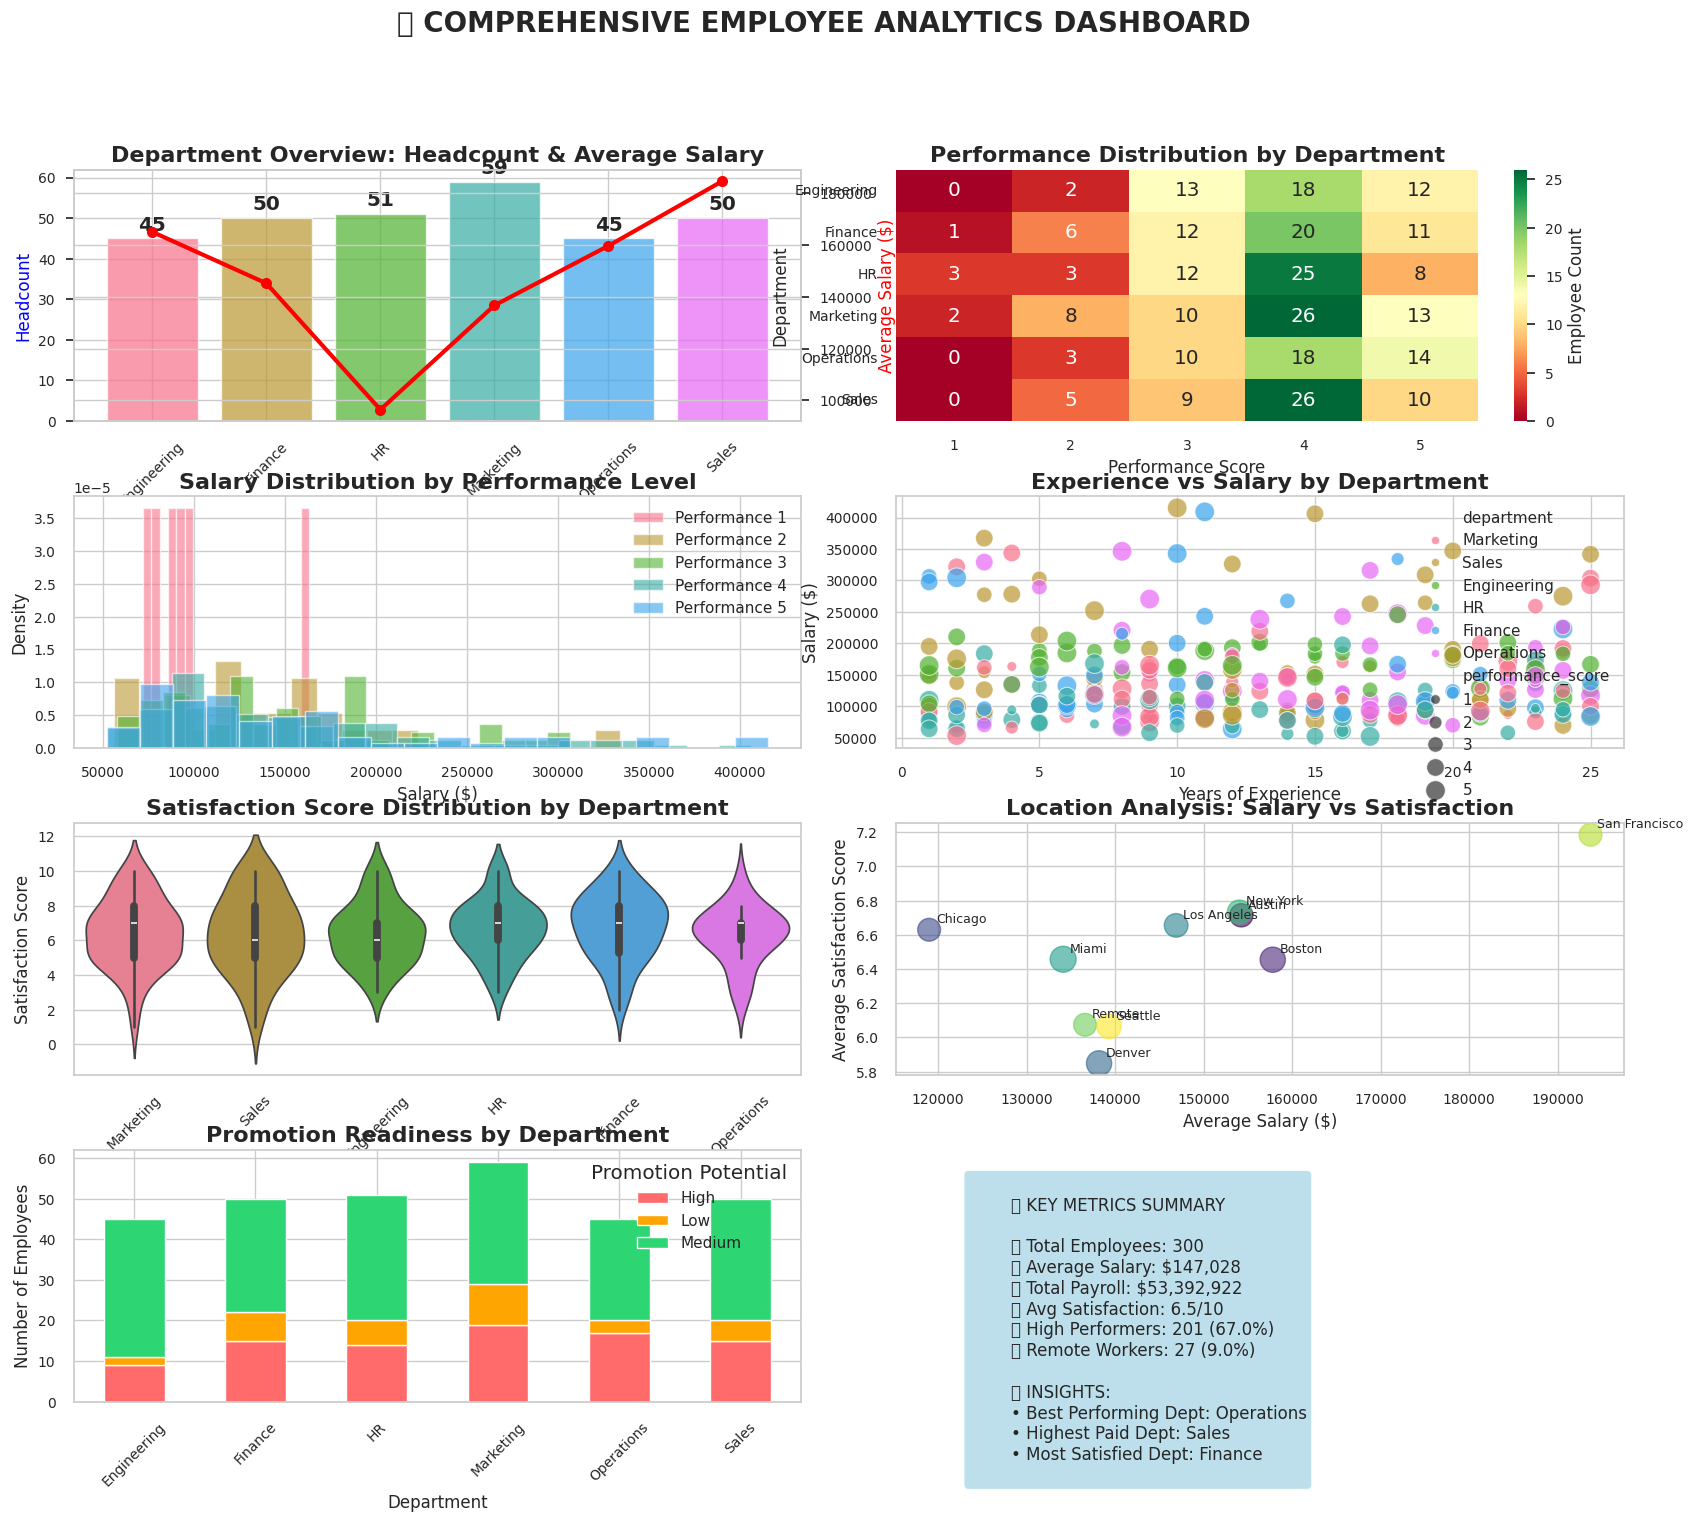

🚀 Initializing Enhanced Employee Analytics with Seaborn...


In [ ]:
# Enhanced Employee Database Assistant with Seaborn Visualizations & PandasAI
# Optimized for Google Colab with stunning data visualizations

# Install required packages with specific numpy version for compatibility
!pip install numpy==1.26.4 pandas==1.5.3
!pip install xarray==2022.11.0 # Install xarray version compatible with pandas 1.5.3
!pip install pandasai matplotlib seaborn plotly openai

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta
import random
from pandasai import SmartDataframe
from pandasai.llm import OpenAI
from pandasai.helpers.df_info import df_type
import warnings
warnings.filterwarnings('ignore')

# Enhanced Seaborn styling
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid", palette="husl")
sns.set_context("notebook", font_scale=1.2)

# Custom color palettes
DEPARTMENT_COLORS = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3']
PERFORMANCE_COLORS = ['#FF4757', '#FF6348', '#FFA502', '#2ED573', '#5F27CD']

class EnhancedEmployeeAnalyzer:
    """Enhanced Employee Database Analyzer with beautiful Seaborn visualizations"""

    def __init__(self, openai_api_key=None):
        self.employee_df = self.create_comprehensive_dataset()
        self.openai_api_key = openai_api_key

        # Configure plotting
        self.setup_visualization_style()

        if openai_api_key:
            try:
                self.llm = OpenAI(api_token=openai_api_key)
                self.smart_df = SmartDataframe(
                    self.employee_df,
                    config={
                        "llm": self.llm,
                        "save_charts": True,
                        "save_charts_path": "./charts/",
                        "enable_cache": False
                    }
                )
                print("✅ PandasAI with enhanced visualization capabilities initialized!")
                self.ai_enabled = True
            except Exception as e:
                print(f"❌ PandasAI initialization failed: {e}")
                self.smart_df = None
                self.ai_enabled = False
        else:
            print("⚠️ No OpenAI API key provided. Using enhanced manual analysis mode.")
            self.smart_df = None
            self.ai_enabled = False

    def setup_visualization_style(self):
        """Setup enhanced visualization styling"""
        # Set matplotlib parameters for better aesthetics
        plt.rcParams.update({
            'figure.figsize': (12, 8),
            'axes.titlesize': 16,
            'axes.labelsize': 12,
            'xtick.labelsize': 10,
            'ytick.labelsize': 10,
            'legend.fontsize': 11,
            'font.family': 'sans-serif'
        })

    def create_comprehensive_dataset(self):
        """Create a rich, realistic employee dataset with enhanced attributes"""
        np.random.seed(42)

        departments = ['Engineering', 'Sales', 'Marketing', 'HR', 'Finance', 'Operations']

        positions = {
            'Engineering': ['Software Engineer', 'Senior Engineer', 'Tech Lead', 'Engineering Manager', 'Principal Engineer', 'Staff Engineer'],
            'Sales': ['Sales Rep', 'Senior Sales Rep', 'Sales Manager', 'VP Sales', 'Account Executive', 'Sales Director'],
            'Marketing': ['Marketing Specialist', 'Marketing Manager', 'Content Creator', 'CMO', 'Brand Manager', 'Digital Marketing Manager'],
            'HR': ['HR Specialist', 'HR Manager', 'Recruiter', 'HR Director', 'Talent Acquisition', 'HR Business Partner'],
            'Finance': ['Financial Analyst', 'Accountant', 'Finance Manager', 'CFO', 'Budget Analyst', 'Controller'],
            'Operations': ['Operations Specialist', 'Operations Manager', 'Project Manager', 'COO', 'Process Analyst', 'Supply Chain Manager']
        }

        skills_by_dept = {
            'Engineering': ['Python', 'JavaScript', 'SQL', 'Docker', 'Kubernetes', 'AWS', 'Machine Learning', 'React', 'Node.js'],
            'Sales': ['CRM', 'Salesforce', 'Negotiation', 'Lead Generation', 'Account Management', 'Communication'],
            'Marketing': ['Google Analytics', 'SEO', 'Content Strategy', 'Social Media', 'Adobe Creative', 'Email Marketing'],
            'HR': ['HRIS', 'Recruitment', 'Employee Relations', 'Compensation', 'Performance Management'],
            'Finance': ['Excel', 'SAP', 'Financial Modeling', 'Budgeting', 'QuickBooks', 'Financial Analysis'],
            'Operations': ['Project Management', 'Lean Six Sigma', 'Supply Chain', 'Process Improvement', 'ERP']
        }

        locations = ['New York', 'San Francisco', 'Chicago', 'Austin', 'Seattle', 'Boston', 'Remote', 'Los Angeles', 'Denver', 'Miami']

        employees = []
        for i in range(300):  # Increased to 300 for better visualization
            dept = random.choice(departments)
            position = random.choice(positions[dept])

            # Realistic salary calculation
            base_salaries = {
                'Engineering': 105000, 'Sales': 85000, 'Marketing': 70000,
                'HR': 65000, 'Finance': 80000, 'Operations': 72000
            }

            # Position-based multipliers
            if any(title in position for title in ['VP', 'CMO', 'CFO', 'COO']):
                multiplier = random.uniform(2.5, 4.0)
            elif 'Director' in position:
                multiplier = random.uniform(1.8, 2.5)
            elif any(title in position for title in ['Manager', 'Lead']):
                multiplier = random.uniform(1.4, 1.9)
            elif any(title in position for title in ['Senior', 'Principal', 'Staff']):
                multiplier = random.uniform(1.2, 1.6)
            else:
                multiplier = random.uniform(0.8, 1.3)

            # Location adjustment
            location = random.choice(locations)
            location_multiplier = {
                'San Francisco': 1.4, 'New York': 1.3, 'Seattle': 1.2, 'Boston': 1.15,
                'Los Angeles': 1.1, 'Chicago': 1.05, 'Austin': 1.0, 'Denver': 0.95,
                'Miami': 0.9, 'Remote': 1.1
            }.get(location, 1.0)

            salary = int(base_salaries[dept] * multiplier * location_multiplier * random.uniform(0.9, 1.2))
            hire_date = datetime.now() - timedelta(days=random.randint(30, 3650))  # Up to 10 years
            years_exp = random.randint(1, 25)

            # Performance scoring with realistic distribution
            performance_weights = [2, 8, 25, 45, 20]  # Most people are average to good
            performance = random.choices([1, 2, 3, 4, 5], weights=performance_weights)[0]

            employee = {
                'employee_id': f'EMP{i+1:03d}',
                'name': f'Employee {i+1}',
                'department': dept,
                'position': position,
                'salary': salary,
                'hire_date': hire_date,
                'performance_score': performance,
                'years_experience': years_exp,
                'location': location,
                'age': random.randint(22, 65),
                'education': random.choices(
                    ['High School', 'Associate', 'Bachelor\'s', 'Master\'s', 'PhD'],
                    weights=[5, 10, 50, 30, 5]
                )[0],
                'bonus': random.randint(0, int(salary * 0.4)),
                # Ensure the sample size is not larger than the population size (number of skills)
                'skills': random.sample(skills_by_dept[dept], min(random.randint(3, 7), len(skills_by_dept[dept]))),
                'satisfaction_score': max(1, min(10, int(np.random.normal(7, 2)))),
                'projects_completed': random.randint(0, 60),
                'training_hours': random.randint(10, 120),
                'remote_work_days': random.randint(0, 5) if location != 'Remote' else 5,
                'team_size': random.randint(1, 15) if 'Manager' in position or 'Lead' in position else 0,
                'certifications': random.randint(0, 5),
                'promotion_ready': random.choice([True, False]) if performance >= 4 else False,
                'work_life_balance': max(1, min(10, int(np.random.normal(6.5, 1.5)))),
                'innovation_score': random.randint(1, 10),
                'collaboration_score': random.randint(1, 10)
            }
            employees.append(employee)

        df = pd.DataFrame(employees)

        # Add calculated fields
        df['total_compensation'] = df['salary'] + df['bonus']
        df['tenure_years'] = (datetime.now() - df['hire_date']).dt.days / 365.25
        df['salary_per_experience'] = df['salary'] / df['years_experience']
        df['overall_score'] = (df['performance_score'] + df['satisfaction_score'] + df['work_life_balance']) / 3
        df['promotion_potential'] = np.where(
            (df['performance_score'] >= 4) & (df['tenure_years'] >= 1) & (df['satisfaction_score'] >= 7),
            'High',
            np.where(df['performance_score'] >= 3, 'Medium', 'Low')
        )

        return df

    def create_executive_dashboard(self):
        """Create a comprehensive executive dashboard with beautiful Seaborn charts"""
        fig = plt.figure(figsize=(20, 16))
        gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.3)

        # Color palettes
        dept_palette = sns.color_palette("husl", len(self.employee_df['department'].unique()))

        # 1. Department headcount and average salary
        ax1 = fig.add_subplot(gs[0, :2])
        dept_summary = self.employee_df.groupby('department').agg({
            'employee_id': 'count',
            'salary': 'mean'
        }).reset_index()
        dept_summary.columns = ['Department', 'Headcount', 'Avg_Salary']

        ax1_twin = ax1.twinx()
        bars1 = ax1.bar(dept_summary['Department'], dept_summary['Headcount'],
                       color=dept_palette, alpha=0.7, label='Headcount')
        line1 = ax1_twin.plot(dept_summary['Department'], dept_summary['Avg_Salary'],
                             color='red', marker='o', linewidth=3, markersize=8, label='Avg Salary')

        ax1.set_title('Department Overview: Headcount & Average Salary', fontsize=16, fontweight='bold')
        ax1.set_xlabel('Department')
        ax1.set_ylabel('Headcount', color='blue')
        ax1_twin.set_ylabel('Average Salary ($)', color='red')
        ax1.tick_params(axis='x', rotation=45)

        # Add value labels on bars
        for bar, count in zip(bars1, dept_summary['Headcount']):
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                    f'{count}', ha='center', va='bottom', fontweight='bold')

        # 2. Performance distribution heatmap
        ax2 = fig.add_subplot(gs[0, 2:])
        perf_dept = pd.crosstab(self.employee_df['department'], self.employee_df['performance_score'])
        sns.heatmap(perf_dept, annot=True, fmt='d', cmap='RdYlGn', ax=ax2, cbar_kws={'label': 'Employee Count'})
        ax2.set_title('Performance Distribution by Department', fontsize=16, fontweight='bold')
        ax2.set_xlabel('Performance Score')
        ax2.set_ylabel('Department')

        # 3. Salary distribution with performance overlay
        ax3 = fig.add_subplot(gs[1, :2])
        for perf in sorted(self.employee_df['performance_score'].unique()):
            subset = self.employee_df[self.employee_df['performance_score'] == perf]
            ax3.hist(subset['salary'], alpha=0.6, label=f'Performance {perf}',
                    bins=20, density=True)
        ax3.set_title('Salary Distribution by Performance Level', fontsize=16, fontweight='bold')
        ax3.set_xlabel('Salary ($)')
        ax3.set_ylabel('Density')
        ax3.legend()

        # 4. Experience vs Salary scatter with department colors
        ax4 = fig.add_subplot(gs[1, 2:])
        sns.scatterplot(data=self.employee_df, x='years_experience', y='salary',
                       hue='department', size='performance_score', sizes=(50, 200),
                       alpha=0.7, ax=ax4)
        ax4.set_title('Experience vs Salary by Department', fontsize=16, fontweight='bold')
        ax4.set_xlabel('Years of Experience')
        ax4.set_ylabel('Salary ($)')

        # 5. Satisfaction scores by department
        ax5 = fig.add_subplot(gs[2, :2])
        sns.violinplot(data=self.employee_df, x='department', y='satisfaction_score',
                      palette=dept_palette, ax=ax5)
        ax5.set_title('Satisfaction Score Distribution by Department', fontsize=16, fontweight='bold')
        ax5.set_xlabel('Department')
        ax5.set_ylabel('Satisfaction Score')
        ax5.tick_params(axis='x', rotation=45)

        # 6. Location analysis
        ax6 = fig.add_subplot(gs[2, 2:])
        location_summary = self.employee_df.groupby('location').agg({
            'salary': 'mean',
            'satisfaction_score': 'mean',
            'employee_id': 'count'
        }).reset_index()
        location_summary = location_summary[location_summary['employee_id'] >= 5]  # Only locations with 5+ employees

        scatter = ax6.scatter(location_summary['salary'], location_summary['satisfaction_score'],
                             s=location_summary['employee_id']*10, alpha=0.6, c=range(len(location_summary)),
                             cmap='viridis')

        for i, row in location_summary.iterrows():
            ax6.annotate(row['location'], (row['salary'], row['satisfaction_score']),
                        xytext=(5, 5), textcoords='offset points', fontsize=9)

        ax6.set_title('Location Analysis: Salary vs Satisfaction', fontsize=16, fontweight='bold')
        ax6.set_xlabel('Average Salary ($)')
        ax6.set_ylabel('Average Satisfaction Score')

        # 7. Promotion readiness analysis
        ax7 = fig.add_subplot(gs[3, :2])
        promo_data = self.employee_df.groupby(['department', 'promotion_potential']).size().unstack(fill_value=0)
        promo_data.plot(kind='bar', stacked=True, ax=ax7, color=['#FF6B6B', '#FFA502', '#2ED573'])
        ax7.set_title('Promotion Readiness by Department', fontsize=16, fontweight='bold')
        ax7.set_xlabel('Department')
        ax7.set_ylabel('Number of Employees')
        ax7.tick_params(axis='x', rotation=45)
        ax7.legend(title='Promotion Potential')

        # 8. Key metrics summary
        ax8 = fig.add_subplot(gs[3, 2:])
        ax8.axis('off')

        # Calculate key metrics
        total_employees = len(self.employee_df)
        avg_salary = self.employee_df['salary'].mean()
        total_payroll = self.employee_df['total_compensation'].sum()
        avg_satisfaction = self.employee_df['satisfaction_score'].mean()
        high_performers = len(self.employee_df[self.employee_df['performance_score'] >= 4])
        remote_workers = len(self.employee_df[self.employee_df['location'] == 'Remote'])

        metrics_text = f"""
        📊 KEY METRICS SUMMARY

        👥 Total Employees: {total_employees:,}
        💰 Average Salary: ${avg_salary:,.0f}
        💼 Total Payroll: ${total_payroll:,.0f}
        ⭐ Avg Satisfaction: {avg_satisfaction:.1f}/10
        🏆 High Performers: {high_performers} ({high_performers/total_employees*100:.1f}%)
        🏠 Remote Workers: {remote_workers} ({remote_workers/total_employees*100:.1f}%)

        📈 INSIGHTS:
        • Best Performing Dept: {self.employee_df.groupby('department')['performance_score'].mean().idxmax()}
        • Highest Paid Dept: {self.employee_df.groupby('department')['salary'].mean().idxmax()}
        • Most Satisfied Dept: {self.employee_df.groupby('department')['satisfaction_score'].mean().idxmax()}
        """

        ax8.text(0.1, 0.9, metrics_text, transform=ax8.transAxes, fontsize=12,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

        plt.suptitle('🏢 COMPREHENSIVE EMPLOYEE ANALYTICS DASHBOARD', fontsize=20, fontweight='bold', y=0.98)
        plt.tight_layout()
        plt.show()

        return dept_summary

    def ai_powered_analysis(self, query):
        """Enhanced AI-powered analysis with automatic chart generation"""
        if not self.ai_enabled:
            return self.enhanced_manual_analysis(query)

        try:
            print(f"🤖 AI Analysis: '{query}'")
            print("🎨 Generating visualizations...")

            # PandasAI will automatically generate charts for many queries
            result = self.smart_df.chat(query)

            # If the result is a plot, it will be saved automatically
            # We can enhance it with additional Seaborn styling
            if hasattr(result, 'show'):
                plt.style.use('seaborn-v0_8')
                result.show()

            return result

        except Exception as e:
            print(f"❌ AI analysis failed: {e}")
            print("🔄 Falling back to enhanced manual analysis...")
            return self.enhanced_manual_analysis(query)

    def enhanced_manual_analysis(self, query):
        """Enhanced manual analysis with beautiful Seaborn visualizations"""
        query_lower = query.lower()

        if 'salary' in query_lower and 'department' in query_lower:
            return self.create_salary_analysis()
        elif 'performance' in query_lower:
            return self.create_performance_analysis()
        elif 'satisfaction' in query_lower:
            return self.create_satisfaction_analysis()
        elif 'location' in query_lower or 'remote' in query_lower:
            return self.create_location_analysis()
        elif 'correlation' in query_lower or 'relationship' in query_lower:
            return self.create_correlation_analysis()
        elif 'top performer' in query_lower or 'best employee' in query_lower:
            return self.create_top_performers_analysis()
        elif 'promotion' in query_lower:
            return self.create_promotion_analysis()
        else:
            return self.suggest_queries()

    def create_salary_analysis(self):
        """Create comprehensive salary analysis with visualizations"""
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('💰 Comprehensive Salary Analysis', fontsize=18, fontweight='bold')

        # 1. Salary by department boxplot
        sns.boxplot(data=self.employee_df, x='department', y='salary', ax=axes[0,0])
        axes[0,0].set_title('Salary Distribution by Department')
        axes[0,0].tick_params(axis='x', rotation=45)

        # 2. Salary vs experience with department hues
        sns.scatterplot(data=self.employee_df, x='years_experience', y='salary',
                       hue='department', alpha=0.7, s=60, ax=axes[0,1])
        axes[0,1].set_title('Salary vs Experience by Department')

        # 3. Average salary by position level
        position_salary = self.employee_df.groupby('position')['salary'].mean().sort_values(ascending=False).head(15)
        sns.barplot(x=position_salary.values, y=position_salary.index,
                   palette='viridis', ax=axes[1,0])
        axes[1,0].set_title('Top 15 Positions by Average Salary')
        axes[1,0].set_xlabel('Average Salary ($)')

        # 4. Salary distribution histogram
        sns.histplot(data=self.employee_df, x='salary', bins=30, kde=True, ax=axes[1,1])
        axes[1,1].set_title('Overall Salary Distribution')
        axes[1,1].axvline(self.employee_df['salary'].mean(), color='red', linestyle='--',
                         label=f"Mean: ${self.employee_df['salary'].mean():,.0f}")
        axes[1,1].legend()

        plt.tight_layout()
        plt.show()

        # Return summary statistics
        summary = self.employee_df.groupby('department')['salary'].agg([
            'count', 'mean', 'median', 'std', 'min', 'max'
        ]).round(2)
        summary.columns = ['Count', 'Mean', 'Median', 'Std Dev', 'Min', 'Max']

        return summary

    def create_performance_analysis(self):
        """Create performance analysis with beautiful visualizations"""
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('⭐ Performance Analysis Dashboard', fontsize=18, fontweight='bold')

        # 1. Performance distribution
        perf_counts = self.employee_df['performance_score'].value_counts().sort_index()
        colors = ['#FF4757', '#FF6348', '#FFA502', '#2ED573', '#5F27CD']
        axes[0,0].bar(perf_counts.index, perf_counts.values, color=colors[:len(perf_counts)])
        axes[0,0].set_title('Performance Score Distribution')
        axes[0,0].set_xlabel('Performance Score')
        axes[0,0].set_ylabel('Number of Employees')

        # Add percentage labels
        total = len(self.employee_df)
        for i, count in enumerate(perf_counts.values):
            axes[0,0].text(perf_counts.index[i], count + 2, f'{count/total*100:.1f}%',
                          ha='center', fontweight='bold')

        # 2. Performance by department heatmap
        perf_dept = pd.crosstab(self.employee_df['department'], self.employee_df['performance_score'])
        sns.heatmap(perf_dept, annot=True, fmt='d', cmap='RdYlGn', ax=axes[0,1])
        axes[0,1].set_title('Performance by Department')

        # 3. Performance vs salary
        sns.boxplot(data=self.employee_df, x='performance_score', y='salary', ax=axes[1,0])
        axes[1,0].set_title('Salary Distribution by Performance Score')

        # 4. Performance correlation matrix
        perf_cols = ['performance_score', 'satisfaction_score', 'work_life_balance',
                    'innovation_score', 'collaboration_score']
        corr_matrix = self.employee_df[perf_cols].corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
        axes[1,1].set_title('Performance Metrics Correlation')

        plt.tight_layout()
        plt.show()

        # Performance insights
        high_performers = self.employee_df[self.employee_df['performance_score'] >= 4]
        insights = {
            'Total High Performers': len(high_performers),
            'High Performer Rate': f"{len(high_performers)/len(self.employee_df)*100:.1f}%",
            'Best Department': self.employee_df.groupby('department')['performance_score'].mean().idxmax(),
            'Avg Performance': self.employee_df['performance_score'].mean()
        }

        return insights

    def create_correlation_analysis(self):
        """Create comprehensive correlation analysis"""
        # Select numeric columns for correlation
        numeric_cols = ['salary', 'performance_score', 'years_experience', 'age',
                       'satisfaction_score', 'training_hours', 'work_life_balance',
                       'innovation_score', 'collaboration_score', 'tenure_years']

        correlation_matrix = self.employee_df[numeric_cols].corr()

        # Create correlation heatmap
        plt.figure(figsize=(12, 10))
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
        sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
                   center=0, square=True, linewidths=0.5)
        plt.title('Employee Metrics Correlation Matrix', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

        # Find strongest correlations
        corr_pairs = []
        for i in range(len(correlation_matrix.columns)):
            for j in range(i+1, len(correlation_matrix.columns)):
                corr_value = correlation_matrix.iloc[i, j]
                if abs(corr_value) > 0.3:  # Only significant correlations
                    corr_pairs.append({
                        'Variable 1': correlation_matrix.columns[i],
                        'Variable 2': correlation_matrix.columns[j],
                        'Correlation': corr_value
                    })

        strong_correlations = pd.DataFrame(corr_pairs).sort_values('Correlation', key=abs, ascending=False)
        return strong_correlations

    def suggest_queries(self):
        """Suggest possible queries with examples"""
        suggestions = """
        🤔 Not sure what to ask? Try these queries:

        📊 SALARY ANALYSIS:
        • "Show me salary distribution by department"
        • "What's the correlation between experience and salary?"
        • "Which positions have the highest average salary?"

        ⭐ PERFORMANCE INSIGHTS:
        • "Analyze performance scores across departments"
        • "Show me top performers by department"
        • "How does performance relate to satisfaction?"

        🏠 LOCATION & REMOTE WORK:
        • "Compare remote vs office worker satisfaction"
        • "What's the salary difference by location?"
        • "Show me remote work patterns"

        📈 ADVANCED ANALYTICS:
        • "Show correlations between all metrics"
        • "Who is ready for promotion?"
        • "Analyze work-life balance trends"
        """

        return suggestions

    def create_custom_visualization(self, chart_type, x_var, y_var, hue_var=None):
        """Create custom visualizations based on user preferences"""
        plt.figure(figsize=(12, 8))

        if chart_type.lower() == 'scatter':
            sns.scatterplot(data=self.employee_df, x=x_var, y=y_var, hue=hue_var, s=80, alpha=0.7)
        elif chart_type.lower() == 'box':
            sns.boxplot(data=self.employee_df, x=x_var, y=y_var)
        elif chart_type.lower() == 'violin':
            sns.violinplot(data=self.employee_df, x=x_var, y=y_var)
        elif chart_type.lower() == 'bar':
            if hue_var:
                sns.barplot(data=self.employee_df, x=x_var, y=y_var, hue=hue_var)
            else:
                plot_data = self.employee_df.groupby(x_var)[y_var].mean().sort_values(ascending=False)
                sns.barplot(x=plot_data.values, y=plot_data.index)

        plt.title(f'{chart_type.title()} Plot: {x_var} vs {y_var}', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

# Enhanced Demo Functions
def enhanced_demo():
    """Run enhanced demo with beautiful visualizations"""
    print("🚀 Initializing Enhanced Employee Analytics with Seaborn...")

    # Get API key
    api_key = input("\n🔑 Enter OpenAI API key (or press Enter for demo mode): ").strip()
    if not api_key:
        api_key = None

    # Initialize analyzer
    analyzer = EnhancedEmployeeAnalyzer(api_key)

    # Show executive dashboard
    print("\n📊 Creating Executive Dashboard...")
    analyzer.create_executive_dashboard()

    # Demo queries with enhanced visualizations
    demo_queries = [
        "Show me salary distribution by department",
        "Analyze performance scores across departments",
        "What are the correlations between employee metrics?",
        "Show me top performers by department"
    ]

    print("\n🎯 Running Demo Queries with Enhanced Visualizations:")
    print("=" * 60)

    for query in demo_queries:
        print(f"\n🔍 Query: {query}")
        print("-" * 40)
        result = analyzer.ai_powered_analysis(query)
        if isinstance(result, pd.DataFrame):
            print(result.head())
        else:
            print(result)

    return analyzer

# Interactive mode with enhanced features
def interactive_mode():
    """Enhanced interactive mode"""
    analyzer = enhanced_demo()

    print("\n🎮 ENHANCED INTERACTIVE MODE:")
    print("=" * 50)
    print("Ask questions about the employee database!")
    print("Special commands:")
    print("• 'dashboard' - Show executive dashboard")
    print("• 'correlations' - Show correlation analysis")
    print("• 'suggestions' - Get query suggestions")
    print("• 'quit' - Exit")

    while True:
        try:
            query = input("\n🤔 Your question: ").strip()

            if query.lower() in ['quit', 'exit']:
                print("👋 Thanks for using the Enhanced Employee Analytics!")
                break
            elif query.lower() == 'dashboard':
                analyzer.create_executive_dashboard()
            elif query.lower() == 'correlations':
                analyzer.create_correlation_analysis()
            elif query.lower() == 'suggestions':
                print(analyzer.suggest_queries())
            elif query:
                result = analyzer.ai_powered_analysis(query)
                if result is not None:
                    print(f"\n📊 Result:\n{result}")

        except KeyboardInterrupt:
            print("\n👋 Thanks for using the Enhanced Employee Analytics!")
            break
        except Exception as e:
            print(f"❌ Error: {e}")

# Quick start for immediate use
def quick_enhanced_start():
    """Quick start with enhanced visualizations"""
    analyzer = EnhancedEmployeeAnalyzer()
    print("🎨 Creating Enhanced Executive Dashboard...")
    analyzer.create_executive_dashboard()
    return analyzer

print("🎉 Enhanced Employee Analytics with Seaborn loaded!")
print("🚀 Run 'interactive_mode()' for full experience")
print("⚡ Run 'quick_enhanced_start()' for immediate demo")

quick_enhanced_start()
interactive_mode()